In [1]:
import pandas as pd
import altair as alt
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()

Saving StreamingHistory0.json to StreamingHistory0 (1).json
Saving StreamingHistory1.json to StreamingHistory1 (1).json
Saving StreamingHistory2.json to StreamingHistory2 (1).json
Saving StreamingHistory3.json to StreamingHistory3 (1).json
Saving StreamingHistory4.json to StreamingHistory4 (1).json


In [3]:
list = []

for i in range(5):
    list.append(pd.read_json('StreamingHistory' + str(i) + '.json'))
    
df = pd.concat(list)
df = df.reset_index(drop=True)

In [4]:
df

,endTime,artistName,trackName,msPlayed
0,2021-01-21 03:27,NIKI,Drive On,11056
1,2021-01-23 18:15,Madeon,Only Way Out (feat. Vancouver Sleep Clinic),226746
2,2021-01-23 18:15,Laura Platt,To The Moon Piano Suite: For River / Born a St...,10843
3,2021-01-23 18:16,Snail's House,[Snowdrift],2350
4,2021-01-23 18:16,Snail's House,[Covered in White],23000
...,...,...,...,...
40723,2022-01-22 17:31,ITZY,SURF,1820
40724,2022-01-22 20:35,ITZY,Not Shy,177728
40725,2022-01-22 20:38,PENTAGON,Daisy,189000
40726,2022-01-22 20:42,ITZY,Not Shy,8775


In [5]:
rows, cols = df.shape

In [6]:
G = nx.MultiDiGraph()

In [7]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [8]:
uniqueSongs = {}

for index, row in df.iterrows():
    if df['trackName'][index] not in uniqueSongs and df['trackName'][index].isalnum():
        # print(df['trackName'][index] + ' : ' + row['trackName'])
        uniqueSongs[row['trackName']]=row['msPlayed']
    if df['trackName'][index] in uniqueSongs:
        uniqueSongs[row['trackName']]+=row['msPlayed']

In [9]:
len(uniqueSongs)

1113

In [10]:
for i in range(len(uniqueSongs)):
  G.add_node(i, name=row['trackName'])

#Normalize the values and turn it into sizes

In [11]:
df.loc[1, 'trackName']

'Only Way Out (feat. Vancouver Sleep Clinic)'

In [12]:
print(df.loc[0, 'trackName'] not in uniqueSongs)

True


In [13]:
G.number_of_nodes()

1113

In [14]:
x = df.loc[0, 'trackName']
y = ''
for row in range(1, rows):
  if df.loc[row, 'trackName'] not in uniqueSongs:
    pass
  else:
    y = df.loc[row, 'trackName']
    G.add_edge(x, y)
    x = y

In [19]:
uniqueSongs

1113

In [17]:
G.edges

OutMultiEdgeView([('Drive On', 'Liar', 0), ('Liar', 'Mirror', 0), ('Liar', 'Mirror', 1), ('Liar', 'Mirror', 2), ('Liar', 'Mirror', 3), ('Liar', 'Megalovania', 0), ('Liar', 'Glide', 0), ('Liar', 'Versailles', 0), ('Liar', 'Cozy', 0), ('Liar', 'River', 0), ('Liar', 'シュガーソングとビターステップ', 0), ('Liar', 'Divinity', 0), ('Liar', 'Divinity', 1), ('Liar', 'Miracle', 0), ('Liar', 'Lionhearted', 0), ('Liar', 'Disappear', 0), ('Liar', 'Disappear', 1), ('Liar', 'more', 0), ('Liar', 'Buttercup', 0), ('Liar', 'character', 0), ('Liar', 'blue', 0), ('Liar', 'ポラリス', 0), ('Liar', 'Caffeine', 0), ('Liar', '風を食む', 0), ('Liar', 'defection', 0), ('Liar', 'Indigo', 0), ('Liar', 'Outerspace', 0), ('Liar', 'Conquer', 0), ('Liar', 'Liar', 0), ('Liar', 'DIFFERENT', 0), ('Liar', 'Irene', 0), ('Liar', 'Irene', 1), ('Liar', 'DOWNPOUR', 0), ('Liar', 'Circles', 0), ('Liar', 'Infinity', 0), ('Liar', 'Blue', 0), ('Mirror', 'Chilly', 0), ('Mirror', 'Chilly', 1), ('Mirror', 'Chilly', 2), ('Mirror', 'Chilly', 3), ('Mirror', '

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

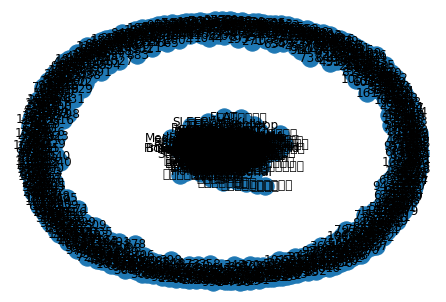

In [16]:
pos=nx.spring_layout(G,scale=100)
nx.draw(G, pos, with_labels = True)
plt.show()